In [1]:
sys.path.insert(0, './common')

import sys
import wave
import ppo_unite

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'env01/Wave'

In [3]:
env = wave.WaveEnv(env_path, worker_id=69)

WAVE environment created.


In [3]:
# BEST PPO 
# hidden_layer = 1024
# ppo_epochs = 5
# clip = 0.2
# minibatch_size=128

hidden_layer = 512
ppo_epochs = 10
clip = 0.2
minibatch_size = 128
model = ppo_unite.PPO(127, 2, hidden_layer, minibatch_size=minibatch_size, ppo_epochs=ppo_epochs, clip=clip, lr=1e-4)

In [10]:
save_path = f'./results/env01/ppo/512-128-ppounite-normalize-complexlayers-4000'
model.set_model_save_path(save_path)

In [11]:
model.load_model()

Model loaded
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


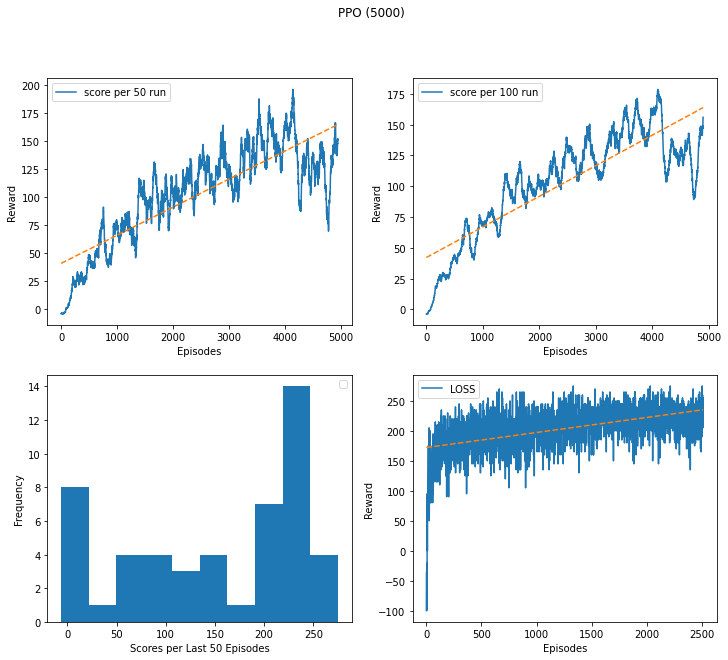

Model saved
Training history saved
saved to ./results/env01/ppo/512-128-ppounite-normalize-complexlayers
epoch: 4999, total timestep: 2514628, total reward: 224.9999703913927, timestep: 1000, lr: 3.4867844010000016e-05


In [7]:
model.set_train_params(max_step=1000, plot_smooth=50, gamma=0.99)
model.train(env, 5000, show_plot=True)

In [7]:
model.save_model()

Model saved
Training history saved


In [ ]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

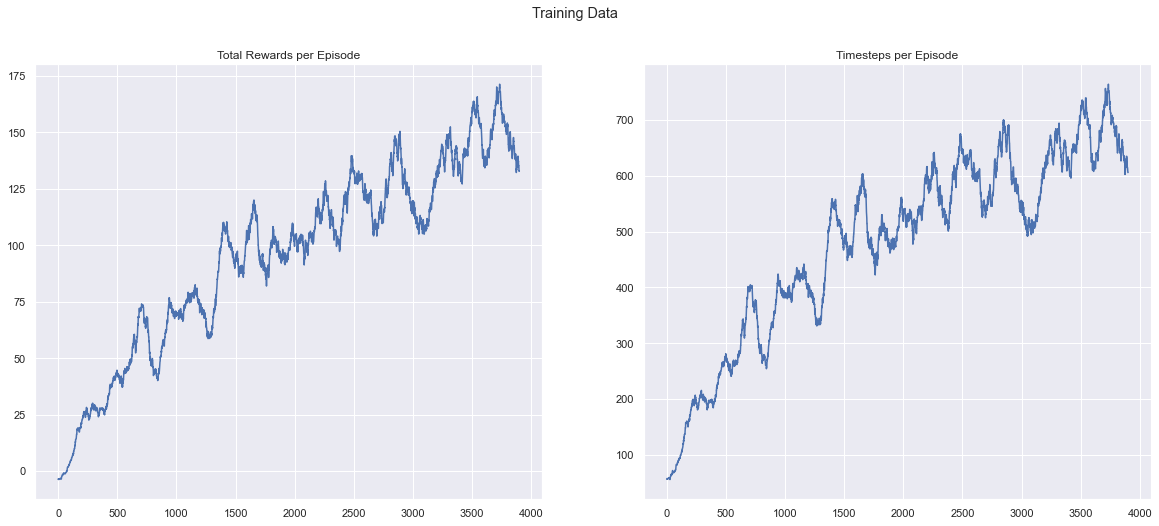

In [12]:
model.plot_train_memory(smooth=100)

In [8]:
env = wave.WaveEnv(env_path, 2, worker_id=1)
model.test(env)

WAVE environment created.


(300.309961527586, 1394)

In [13]:
env = wave.WaveEnv(env_path, 20, worker_id=3)
model.test_avg(env, 100)

WAVE environment created.
15336.628063291311 64868
10710.618643015623 45388
12005.97846442461 50981
-9.339999705553055 87
10156.588708281517 43969
4716.569374144077 20369
8212.568956300616 35349
15405.877985164523 65683
47.41999287903309 352
15569.91801789403 66802
17737.617729887366 75548
17575.027773872018 75800
-6.210000157356262 25
16279.287905752659 69315
-9.969999685883522 100
5547.759292423725 22945
-6.189999893307686 24
7677.65899887681 32747
7042.309073358774 29354
958.9198725372553 4322
11514.428495973349 49712
13986.978225558996 58761
7372.959045022726 31841
-6.21999990940094 25
13813.618178412318 57628
716.7699072062969 2965
12712.008382707834 54160
13401.208300501108 57176
4042.869473800063 17743
9837.74873456359 41745
18103.607703253627 76628
9390.86883045733 39383
13976.768138289452 59965
4081.5594527572393 17969
3019.219616830349 12616
-6.189999893307686 24
17467.767746284604 74845
2483.529672726989 10430
2003.3997313082218 8732
1392.799812823534 6144
3271.3595787882805

([15336.628063291311,
  10710.618643015623,
  12005.97846442461,
  -9.339999705553055,
  10156.588708281517,
  4716.569374144077,
  8212.568956300616,
  15405.877985164523,
  47.41999287903309,
  15569.91801789403,
  17737.617729887366,
  17575.027773872018,
  -6.210000157356262,
  16279.287905752659,
  -9.969999685883522,
  5547.759292423725,
  -6.189999893307686,
  7677.65899887681,
  7042.309073358774,
  958.9198725372553,
  11514.428495973349,
  13986.978225558996,
  7372.959045022726,
  -6.21999990940094,
  13813.618178412318,
  716.7699072062969,
  12712.008382707834,
  13401.208300501108,
  4042.869473800063,
  9837.74873456359,
  18103.607703253627,
  9390.86883045733,
  13976.768138289452,
  4081.5594527572393,
  3019.219616830349,
  -6.189999893307686,
  17467.767746284604,
  2483.529672726989,
  2003.3997313082218,
  1392.799812823534,
  3271.3595787882805,
  11449.878528058529,
  2779.519636616111,
  10473.408592492342,
  930.2298679202795,
  1266.0798290669918,
  977.75987

In [7]:
# 432.7257438251376, 1901.86
env.close()